In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# How many rows and columns?
df.shape

(15120, 56)

In [4]:
# Cardinality of each column
df.apply(pd.Series.nunique)

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

In [5]:
# First few rows
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [6]:
# Get an idea of null values
df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [7]:
def recode_one_hot_columns(df, cols, col_name):
    # If cols_to_check are one-hot encoded, each row should sum to 1
    # Here we sum each across columns, and check the number of unique sums per row
    res = df[cols].sum(axis=1).value_counts()
    
    # Check that there's one one unique column sum per all rows, and that it is 1.
    if len(res.index) == 1 and res.index[0] == 1:
        print(f"Columns for {col_name} are one-hot encoded. Recoding to sinle column.")
        
        # Rename the cols, then reverse the one-hot encoding
        renamed_cols = [col.strip(col_name) for col in cols]
        df.rename(columns = dict(zip(cols, renamed_cols)), inplace = True)
        df[col_name] = df[renamed_cols].idxmax(axis=1)

        # Drop the original cols
        df = df.drop(renamed_cols, axis=1)
        return df
    else:
        print("Error: columns are not one-hot encoded, cannot recode.")

In [8]:
# Converting the soil type columns back to a single column
soil_cols = [col for col in df.columns if 'Soil_Type' in col]

df = recode_one_hot_columns(df, soil_cols, 'Soil_Type')

Columns for Soil_Type are one-hot encoded. Recoding to sinle column.


In [9]:
# Same for wilderness columns
wild_cols = [col for col in df.columns if 'Wilderness_Area' in col]

# Check its one-hot
df = recode_one_hot_columns(df, wild_cols, 'Wilderness_Area')

Columns for Wilderness_Area are one-hot encoded. Recoding to sinle column.


In [10]:
# Taking a look at the cardinalities to show we've recoded correctly
df.apply(pd.Series.nunique)

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Cover_Type                                7
Soil_Type                                38
Wilderness_Area                           4
dtype: int64

In [11]:
df['Cover_Type'] = df['Cover_Type'] .astype('category')
df['Soil_Type'] = df['Soil_Type'] .astype('category')
df['Wilderness_Area'] = df['Wilderness_Area'] .astype('category')
df['Id'] = df['Id'] .astype(object)

In [12]:
# Now we can look at each variable's distribution
cat_vars = ['Wilderness_Area', 'Soil_Type']
num_vars = ['Elevation', 'Aspect', 'Slope',
            'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways', 
            'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']

<AxesSubplot:xlabel='Cover_Type', ylabel='Count'>

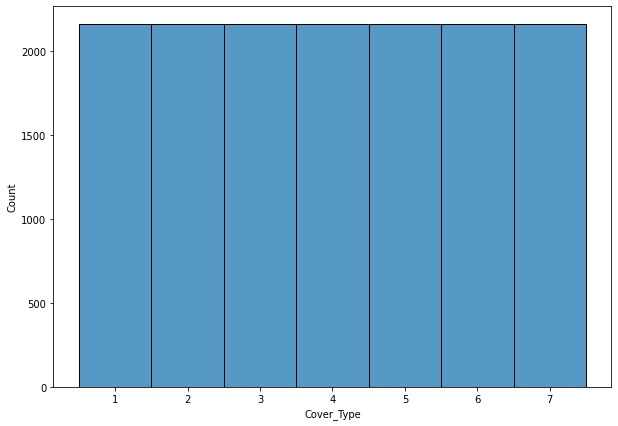

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='Cover_Type')

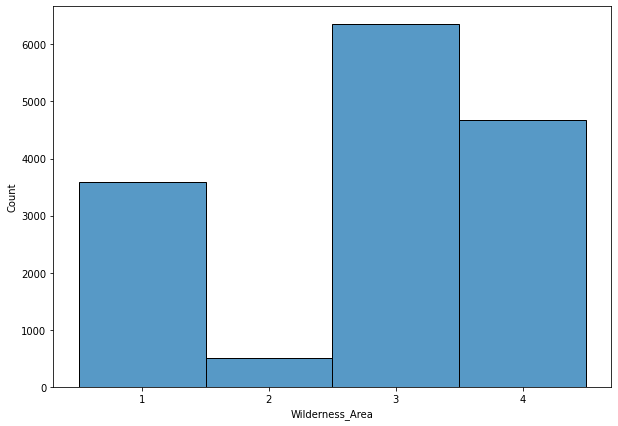

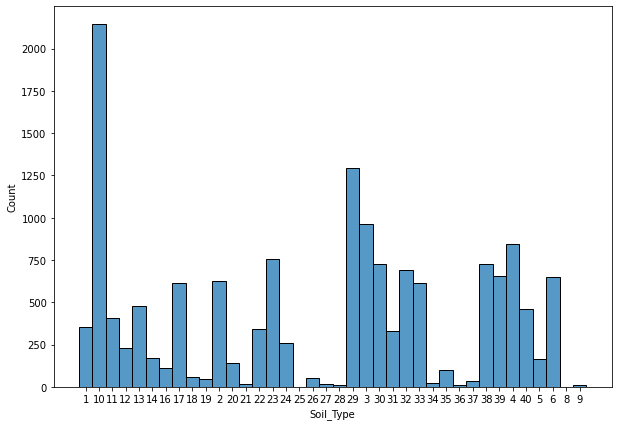

In [14]:
for var in cat_vars:
    plt.figure(figsize=(10, 7))
    sns.histplot(data=df, x=var)

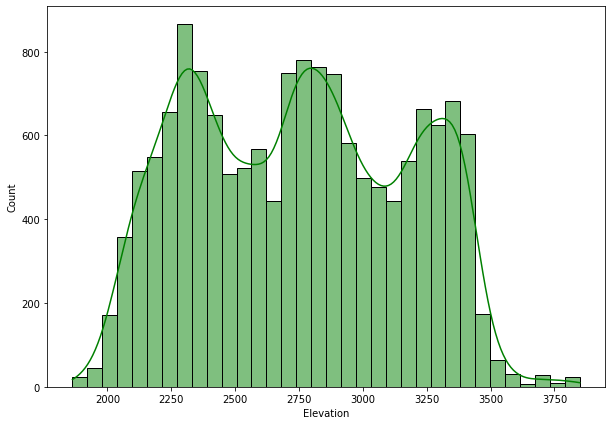

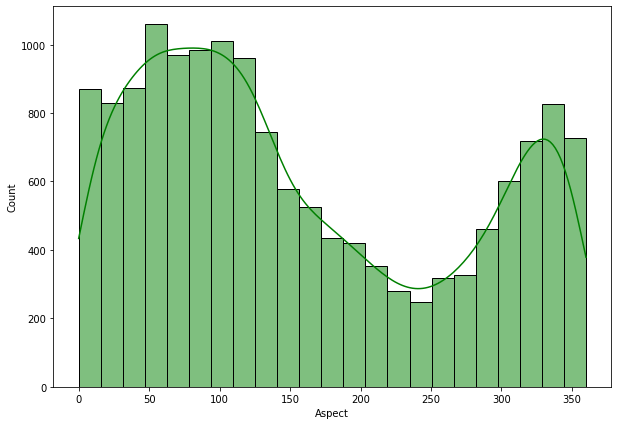

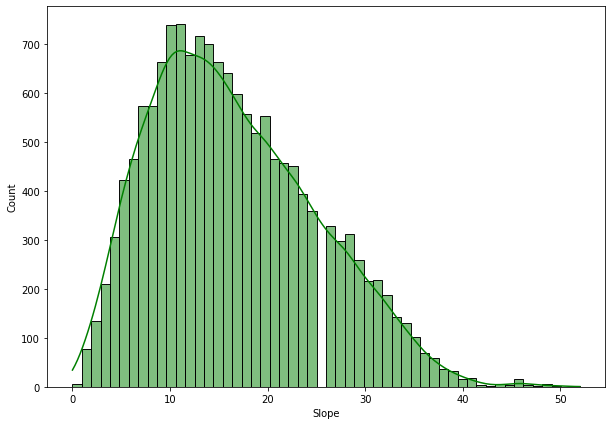

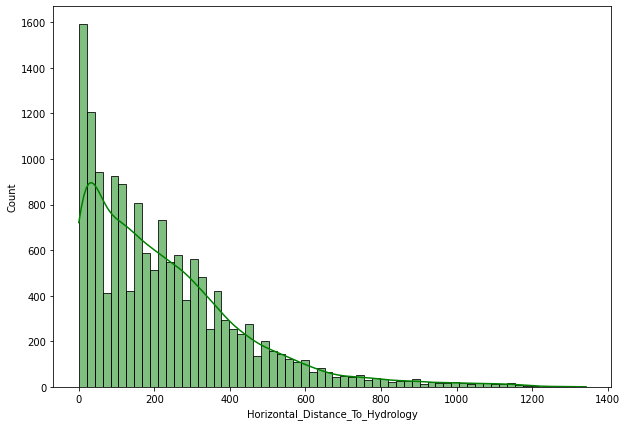

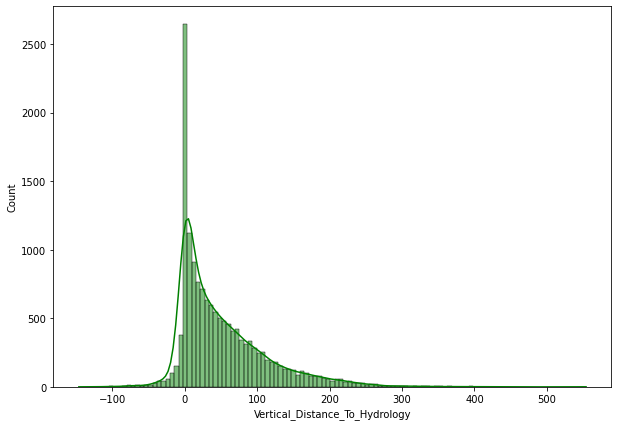

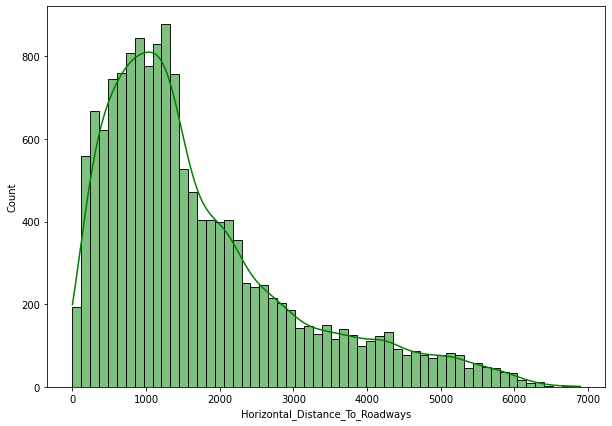

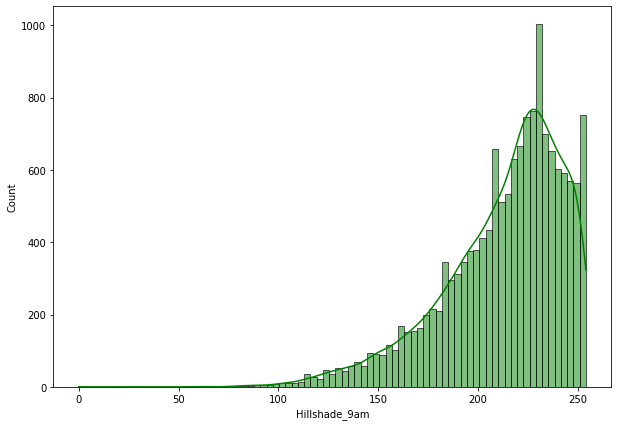

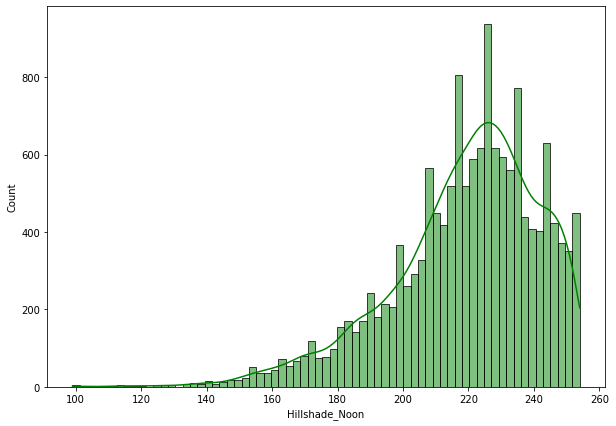

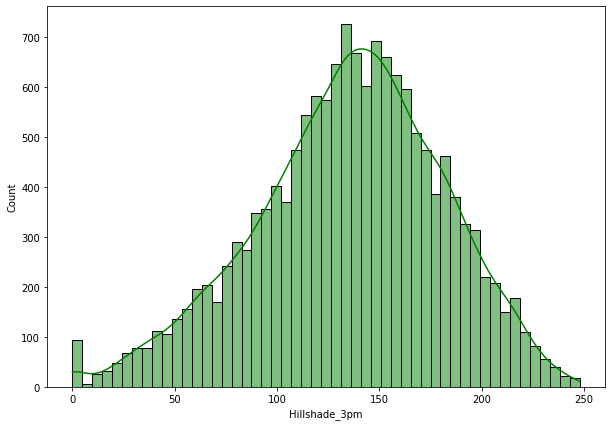

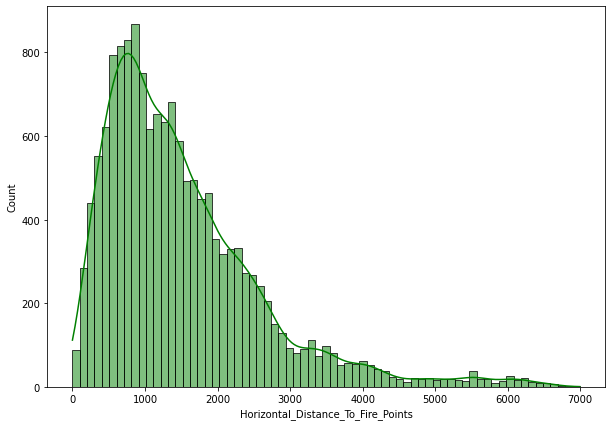

In [15]:
for num_var in num_vars:
    plt.figure(figsize=(10, 7))
    sns.histplot (df[num_var], color='g', kde=True)

In [16]:
# Mutual information
X = df.loc[:, df.columns != 'Id'].copy()
y = X.pop("Cover_Type")
y, _ = y.factorize()

# Label encoding for categoricals
discrete_features = X.dtypes == object
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [17]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

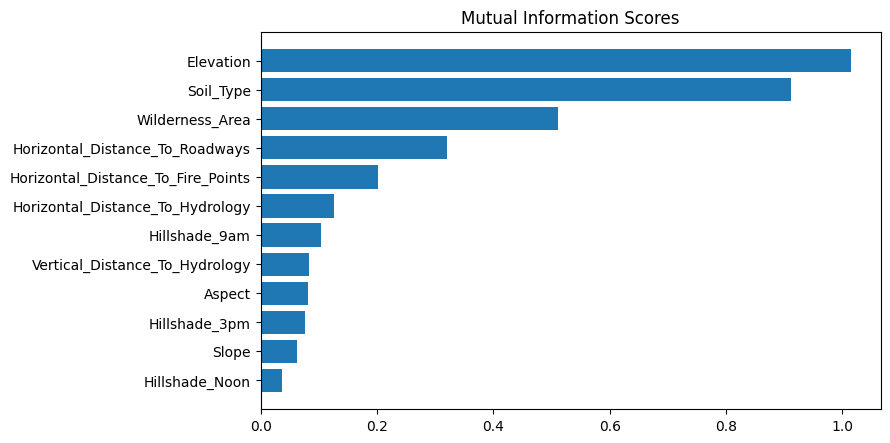

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [19]:
# Using a random forest to look at which features are most important
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=1)

Text(0.5, 1.0, 'RF Feature Importance')

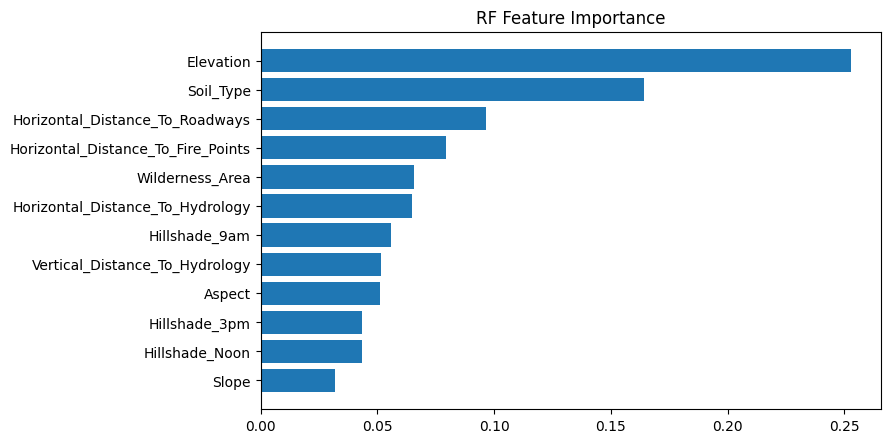

In [20]:
plt.figure(dpi=100, figsize=(8, 5))
feat_labels = X.columns
importances = forest.feature_importances_
indices = np.argsort(importances)

width = np.arange(len(importances))
plt.barh(width, importances[indices])
plt.yticks(width, feat_labels[indices])
plt.title("RF Feature Importance")

<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

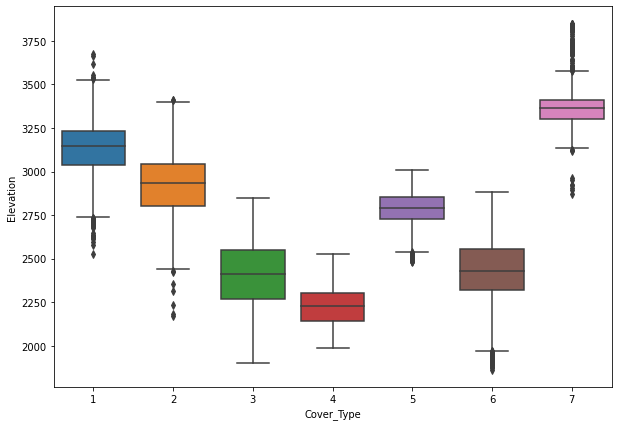

In [21]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Cover_Type', y='Elevation')

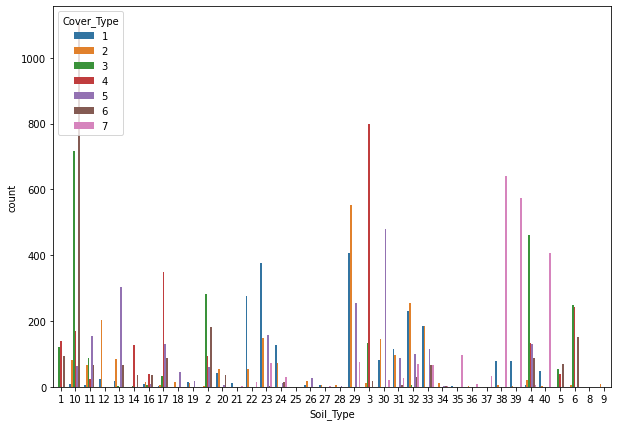

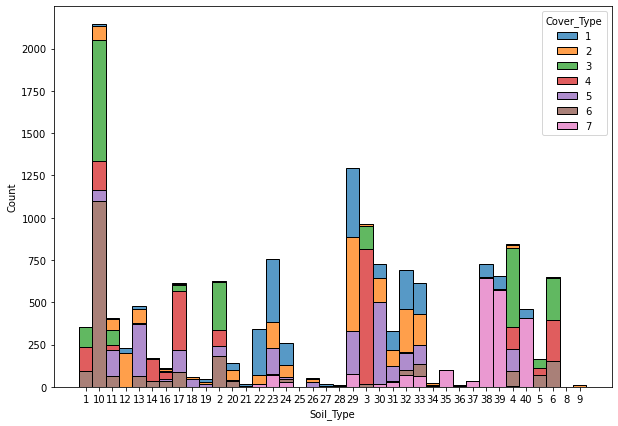

In [23]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Soil_Type', hue = 'Cover_Type', data= df)
plt.show()

plt.figure(figsize=(10, 7))
sns.histplot(binwidth=0.5, x="Soil_Type", hue="Cover_Type", data=df, stat="count", multiple="stack")
plt.show()

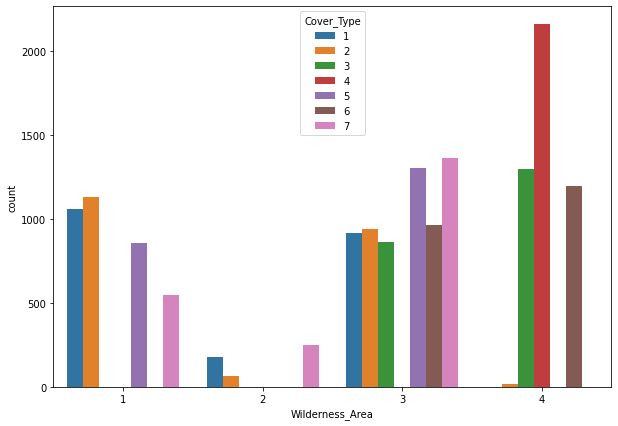

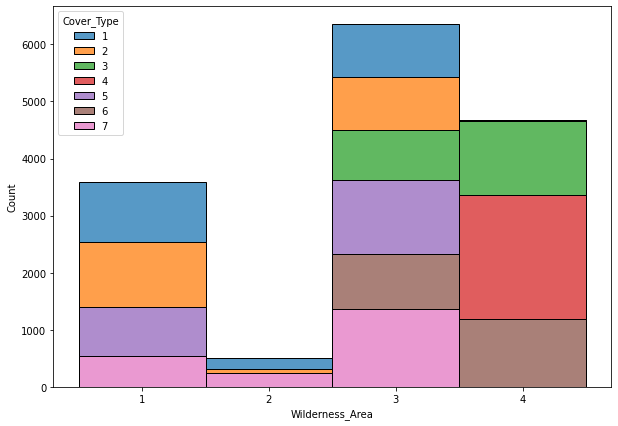

In [24]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Wilderness_Area', hue='Cover_Type', data= df)
plt.show()

plt.figure(figsize=(10, 7))
sns.histplot(binwidth=0.5, x="Wilderness_Area", hue="Cover_Type", data=df, stat="count", multiple="stack")
plt.show()

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Roadways'>

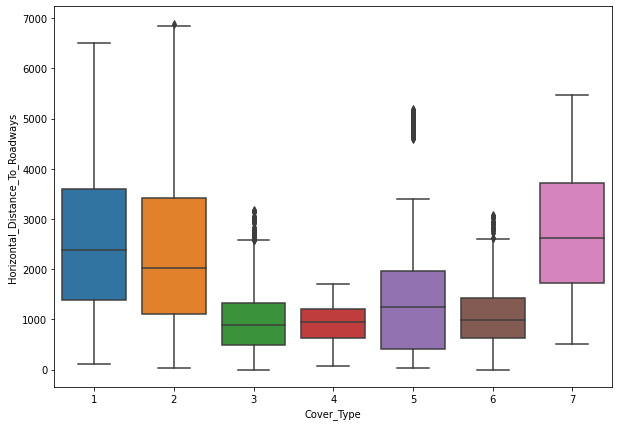

In [25]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Cover_Type', y='Horizontal_Distance_To_Roadways')

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

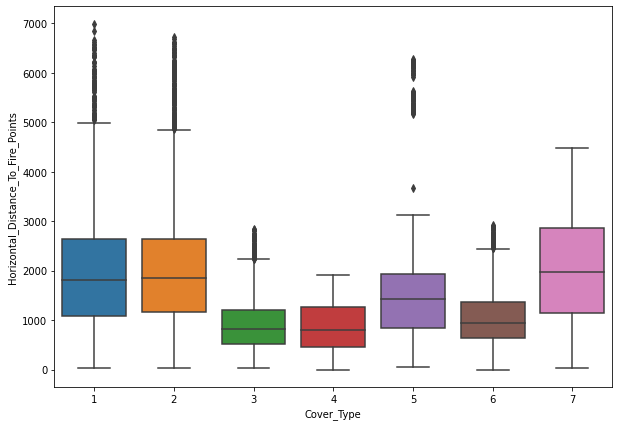

In [26]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Cover_Type', y='Horizontal_Distance_To_Fire_Points')

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

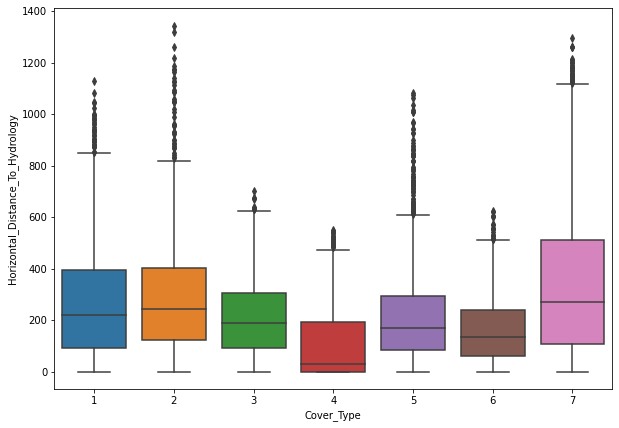

In [27]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Cover_Type', y='Horizontal_Distance_To_Hydrology')

<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

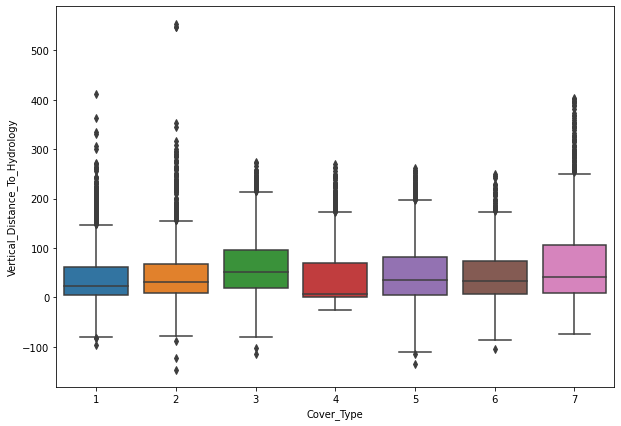

In [28]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Cover_Type', y='Vertical_Distance_To_Hydrology')

In [29]:
from sklearn.decomposition import PCA

In [30]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

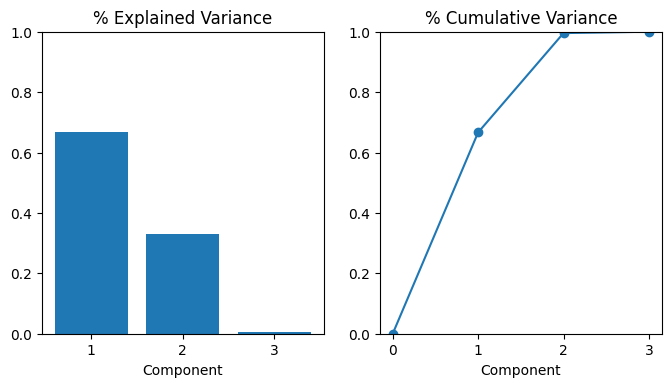

In [37]:
X = df[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].copy()

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

plot_variance(pca)

In [38]:
df['Shade_1'] = X_pca['PC1']
df['Shade_2'] = X_pca['PC2']

<AxesSubplot:xlabel='Cover_Type', ylabel='Shade_1'>

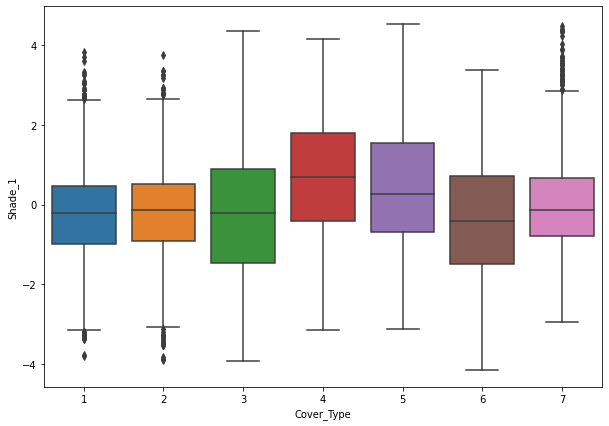

In [39]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Cover_Type', y='Shade_1')

<AxesSubplot:xlabel='Cover_Type', ylabel='Shade_2'>

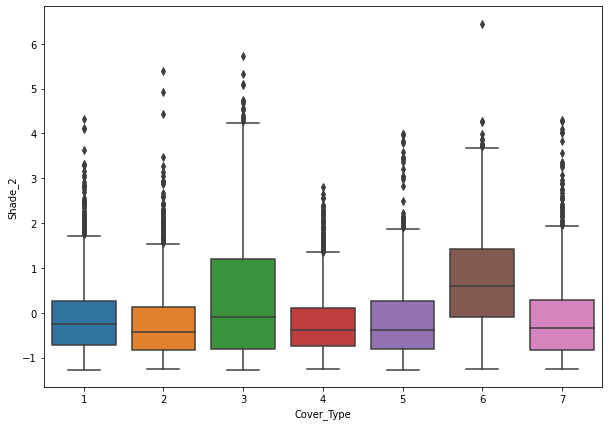

In [40]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Cover_Type', y='Shade_2')

In [41]:
# Each soil type is mapped to a climatic zone
soil_type_to_clim = {
    '1':2,'2':2,'3':2,'4':2,'5':2,
    '6':2,'7':3,'8':3,'9':4,'10':4,
    '11':4,'12':4,'13':4,'14':5,'15':5,
    '16':6,'17':6,'18':6,'19':7,'20':7,
    '21':7,'22':7,'23':7,'24':7,'25':7,
    '26':7,'27':7,'28':7,'29':7,'30':7,
    '31':7,'32':7,'33':7,'34':7,'35':8,
    '36':8,'37':8,'38':8,'39':8,'40':8
}

# Each soil type is mapped to a geological zone
soil_type_to_geo = {
    '1':7,'2':7,'3':7,'4':7,'5':7,
    '6':7,'7':5,'8':5,'9':2,'10':7,
    '11':7,'12':7,'13':7,'14':1,'15':1,
    '16':1,'17':1,'18':7,'19':1,'20':1,
    '21':1,'22':2,'23':2,'24':7,'25':7,
    '26':7,'27':7,'28':7,'29':7,'30':7,
    '31':7,'32':7,'33':7,'34':7,'35':7,
    '36':7,'37':7,'38':7,'39':7,'40':7
}

soil_type_to_rock = {
    '1':4,'2':3,'3':1,'4':1,'5':1,
    '6':2,'7':0,'8':0,'9':3,'10':1,
    '11':1,'12':2,'13':1,'14':0,'15':0,
    '16':0,'17':0,'18':3,'19':0,'20':0,
    '21':0,'22':5,'23':0,'24':4,'25':4,
    '26':3,'27':4,'28':4,'29':4,'30':4,
    '31':4,'32':4,'33':4,'34':4,'35':0,
    '36':4,'37':4,'38':4,'39':4,'40':4
}

In [42]:
df['Clim_Zone']= df['Soil_Type'].map(soil_type_to_clim).astype(object)
df['Geo_Zone']= df['Soil_Type'].map(soil_type_to_geo).astype(object)
df['Rock_Cover']= df['Soil_Type'].map(soil_type_to_rock).astype(object)

/Users/hector/anaconda3/envs/kaggle/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


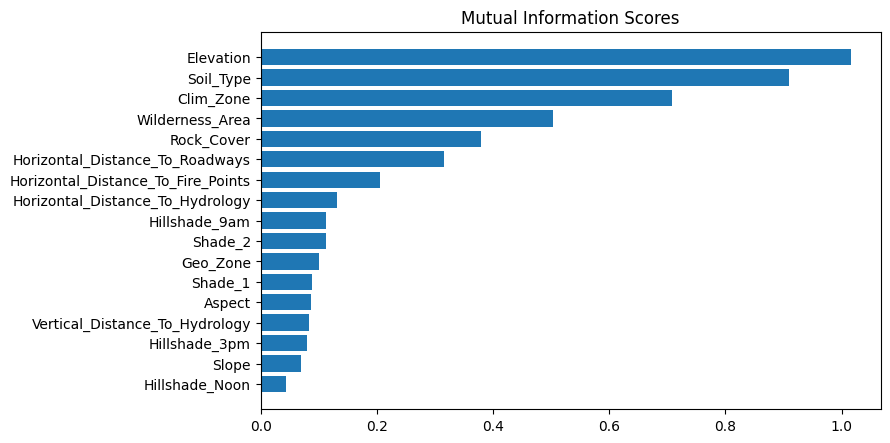

In [43]:
# Now re-doing MI analysis to see whether these new features are informative
# Mutual information
X = df.loc[:, df.columns != 'Id'].copy()
y = X.pop("Cover_Type")
y, _ = y.factorize()

# Label encoding for categoricals
discrete_features = X.dtypes == object
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
mi_scores = make_mi_scores(X, y, discrete_features)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

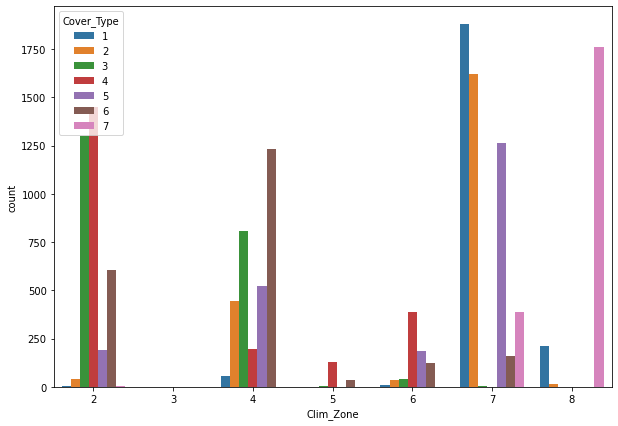

In [44]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Clim_Zone', hue='Cover_Type', data= df)
plt.show()

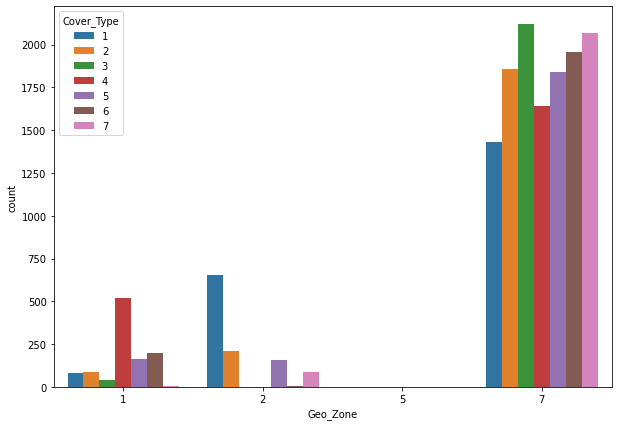

In [45]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Geo_Zone', hue='Cover_Type', data= df)
plt.show()

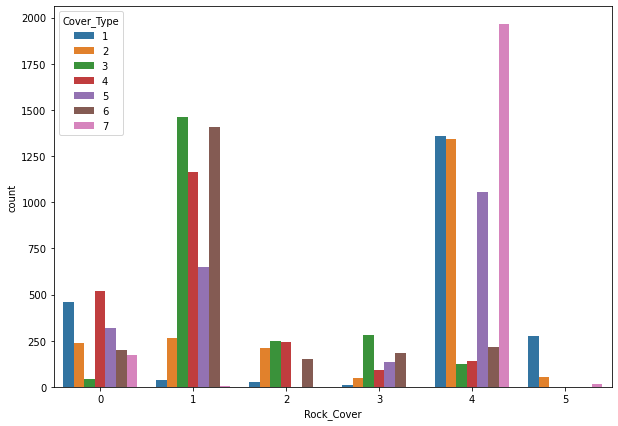

In [46]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Rock_Cover', hue='Cover_Type', data= df)
plt.show()

<AxesSubplot:xlabel='Cover_Type', ylabel='Distance_To_Hydrology'>

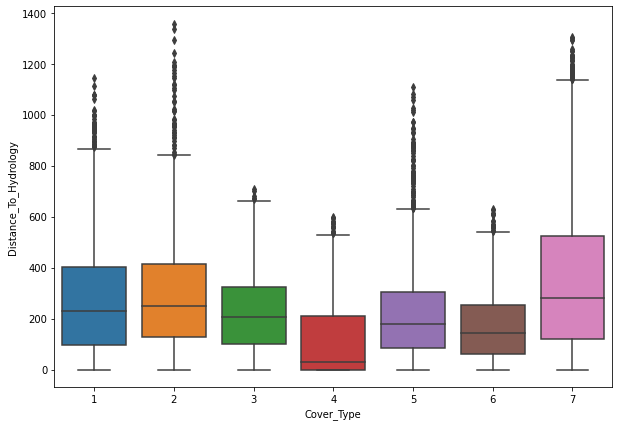

In [47]:
df['Distance_To_Hydrology'] = (df['Horizontal_Distance_To_Hydrology']**2+df['Vertical_Distance_To_Hydrology']**2)**0.5

plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Cover_Type', y='Distance_To_Hydrology')

/Users/hector/anaconda3/envs/kaggle/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


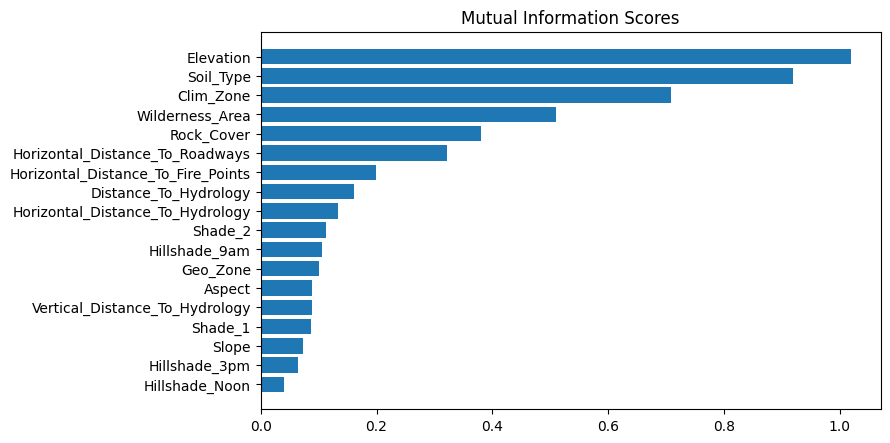

In [48]:
# Now re-doing MI analysis to see whether these new features are informative
# Mutual information
X = df.loc[:, df.columns != 'Id'].copy()
y = X.pop("Cover_Type")
y, _ = y.factorize()

# Label encoding for categoricals
discrete_features = X.dtypes == object
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
mi_scores = make_mi_scores(X, y, discrete_features)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [49]:
from sklearn.dummy import DummyClassifier
X = df[cat_vars+num_vars]
y = df['Cover_Type']
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.14285714285714285

In [50]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.14173280423280424

In [51]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.1414021164021164

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))])

In [53]:
from sklearn.model_selection import cross_val_score

original_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                 'Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
                 'Cover_Type', 'Soil_Type', 'Wilderness_Area']

X = df.loc[:, original_cols].copy()
y = X.pop("Cover_Type")

orig_scores = cross_val_score(my_pipeline, X, y,
                         cv=12)

print(f"Original feature scores:\n{orig_scores}\nMean:\n{orig_scores.mean()}")


Original feature scores:
[0.43720504 0.4988224  0.08216197 0.36853005 0.42234005 0.55231224
 0.64170252 0.74807318 0.582045   0.71994875 0.62472716 0.80145473]
Mean:
0.5399435918990838


In [54]:
new_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                 'Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
                 'Cover_Type', 'Soil_Type', 'Wilderness_Area',
            'Clim_Zone', 'Geo_Zone', 'Rock_Cover']

X = df.loc[:, new_cols].copy()
y = X.pop("Cover_Type")

new_scores = cross_val_score(my_pipeline, X, y,
                         cv=12)

print(f"New feature scores:\n{new_scores}\nMean:\n{new_scores.mean()}")

New feature scores:
[0.45031963 0.51035835 0.07279546 0.3776114  0.4146111  0.54955133
 0.64272563 0.75388482 0.57878303 0.72361568 0.62416869 0.80172283]
Mean:
0.5416789958736455


In [56]:
ratio_cols = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Shade_1', 'Shade_2', 'Distance_To_Hydrology']


In [58]:
# Custom divide to avoid /0 errors
def div(numerator, denominator):
    return lambda row: 0 if row[denominator] == 0 else float(row[numerator]/row[denominator])

from itertools import permutations

new_ratios = []

# Creating some ratios
for col1, col2 in combinations(ratio_cols, 2):
    new_ratios.append(col1+'/'+col2)

    df[col1+'/'+col2] = df.apply(div(col1, col2), axis=1)

In [34]:
# Mutual information
X = df.loc[:, df.columns != 'Id'].copy()
y = X.pop("Cover_Type")
y, _ = y.factorize()

# Label encoding for categoricals
discrete_features = X.dtypes == object
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
mi_scores = make_mi_scores(X, y, discrete_features)

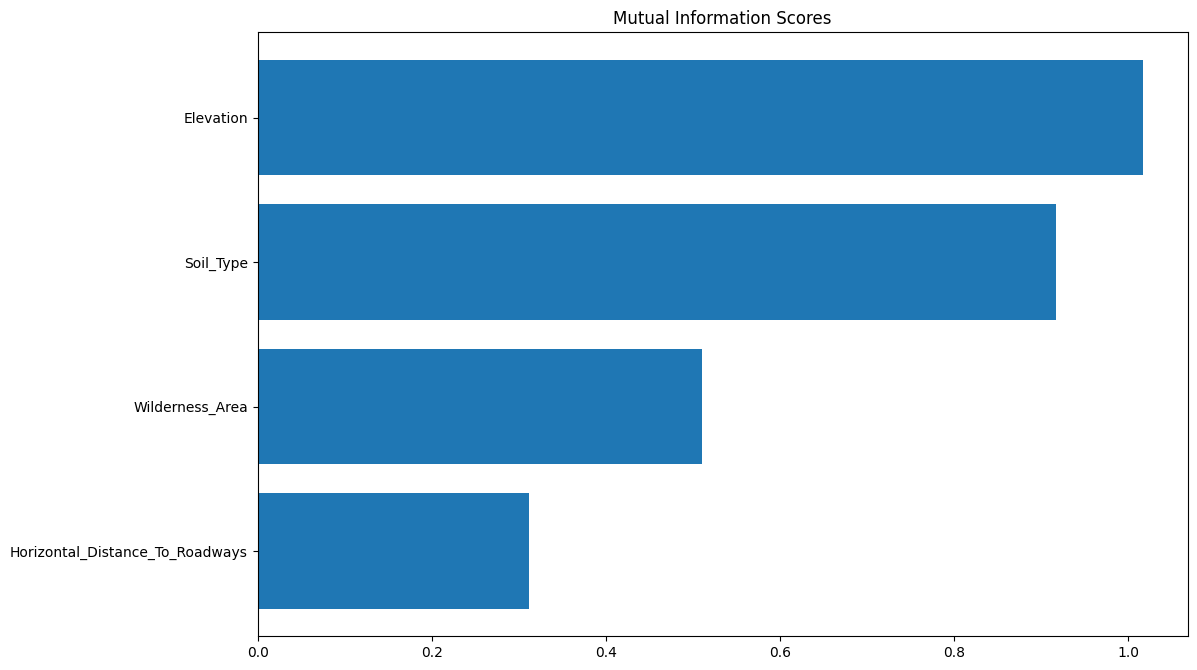

In [35]:
plt.figure(dpi=100, figsize=(12, 8))
plot_mi_scores(mi_scores[mi_scores>0.2])

In [36]:
# Testing these
